## Importing Libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn import tree

In [2]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df = df.drop(['Id'], axis= 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
dependent = df.Species
dependent

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [10]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
independent = df.drop(['Species'], axis=1)
independent

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
x_train , x_test , y_train , y_test = train_test_split(independent,dependent, test_size = 0.2)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [14]:
model = DecisionTreeClassifier()

In [15]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
model.score(x_train , y_train)

1.0

In [18]:
model.score(x_test, y_test)

0.9333333333333333

In [19]:
y_predict = model.predict(x_test)

In [20]:
y_predict

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
116,Iris-virginica,Iris-virginica
37,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
144,Iris-virginica,Iris-virginica
89,Iris-versicolor,Iris-versicolor
35,Iris-setosa,Iris-setosa
57,Iris-versicolor,Iris-virginica
84,Iris-versicolor,Iris-versicolor
38,Iris-setosa,Iris-setosa
22,Iris-setosa,Iris-setosa


## Confusion Matrix

In [28]:
performance = confusion_matrix(y_test, y_predict)

In [29]:
performance

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [30]:
p = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
p

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica
Actual,,,
Iris-setosa,10,0,0
Iris-versicolor,0,8,1
Iris-virginica,0,1,10


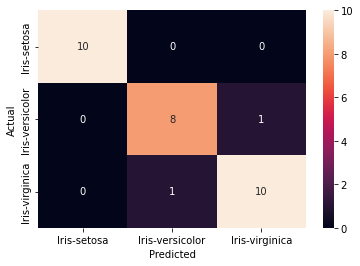

In [33]:
sns.heatmap(p, annot = True)
plt.show()

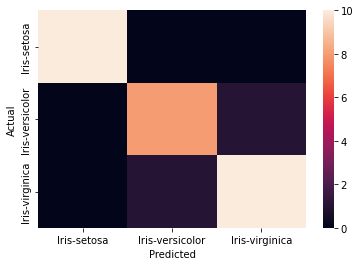

In [32]:
sns.heatmap(p)
plt.show()

In [35]:
f = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
f

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [36]:
c = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
c

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

[Text(279.0, 622.875, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = Iris-versicolor'),
 Text(209.25, 509.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(348.75, 509.625, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = Iris-versicolor'),
 Text(139.5, 396.375, 'SepalLengthCm <= 4.95\ngini = 0.13\nsamples = 43\nvalue = [0, 40, 3]\nclass = Iris-versicolor'),
 Text(69.75, 283.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(209.25, 283.125, 'PetalLengthCm <= 4.95\ngini = 0.091\nsamples = 42\nvalue = [0, 40, 2]\nclass = Iris-versicolor'),
 Text(139.5, 169.875, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = Iris-versicolor'),
 Text(279.0, 169.875, 'PetalWidthCm <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = Iris-versicolor'),
 Text(209.25, 56.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = Iris-virginica'),
 Text(348.75, 56.625, '

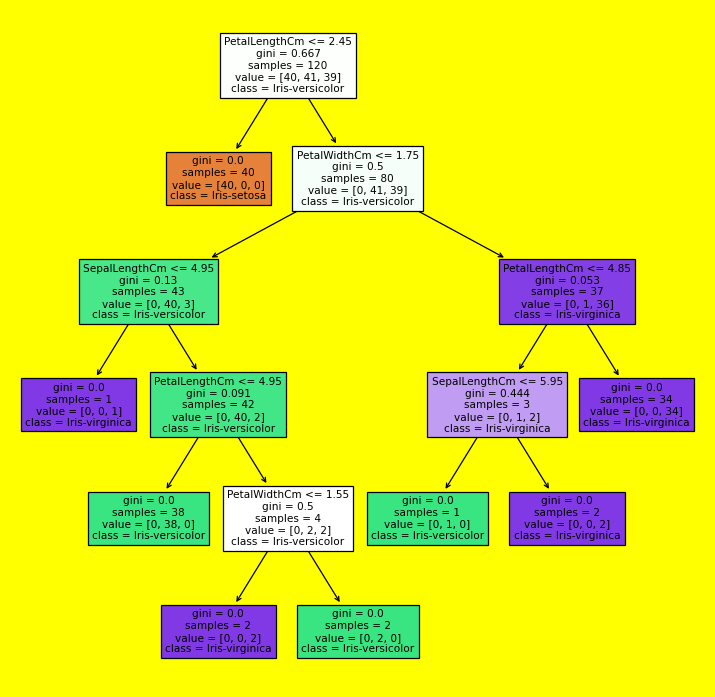

In [56]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi = 90, facecolor = 'yellow')
tree.plot_tree(model, feature_names = f, class_names = c, filled = True)